<a href="https://colab.research.google.com/github/ParhamPishro/Some-of-Algorithms-in-Data-Science/blob/main/3Clustering/3.1K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

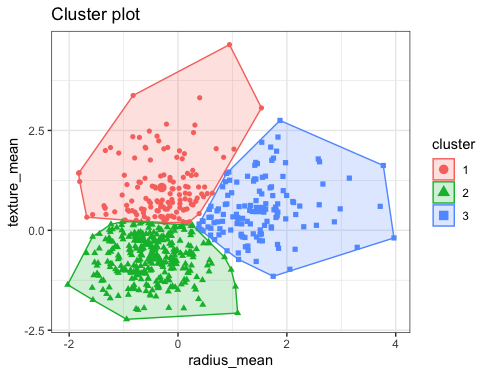

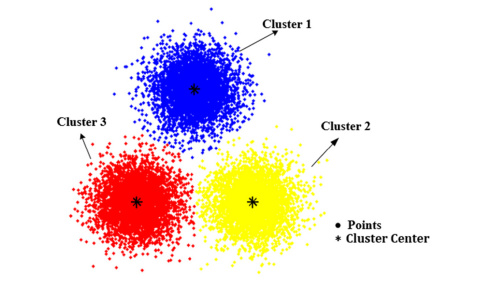

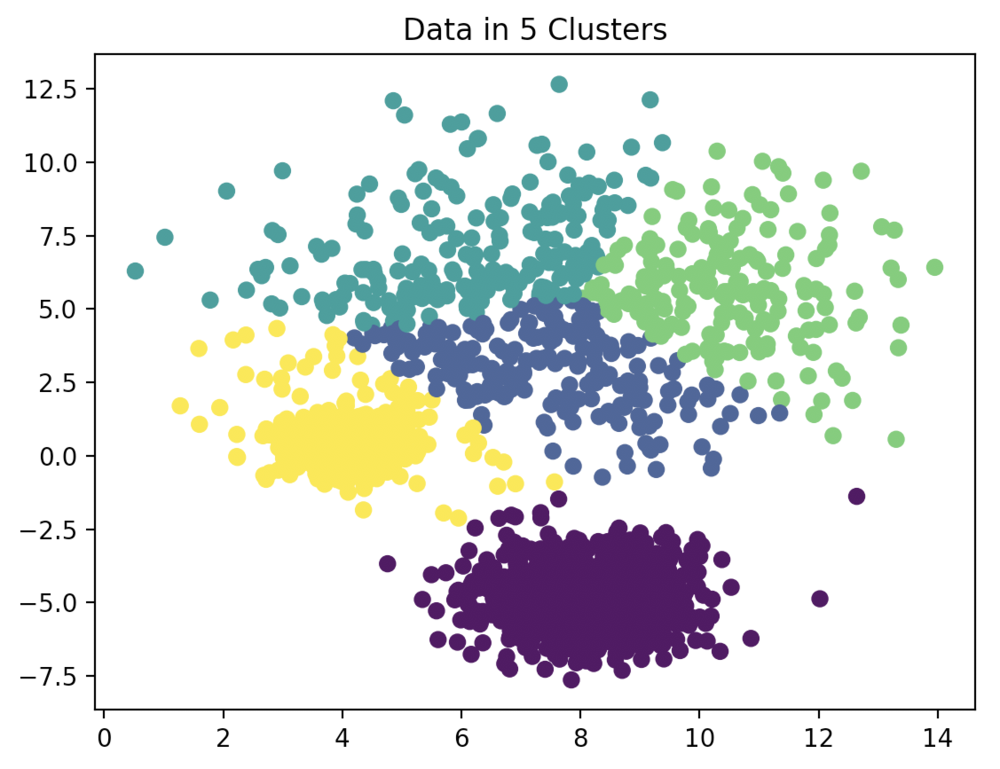

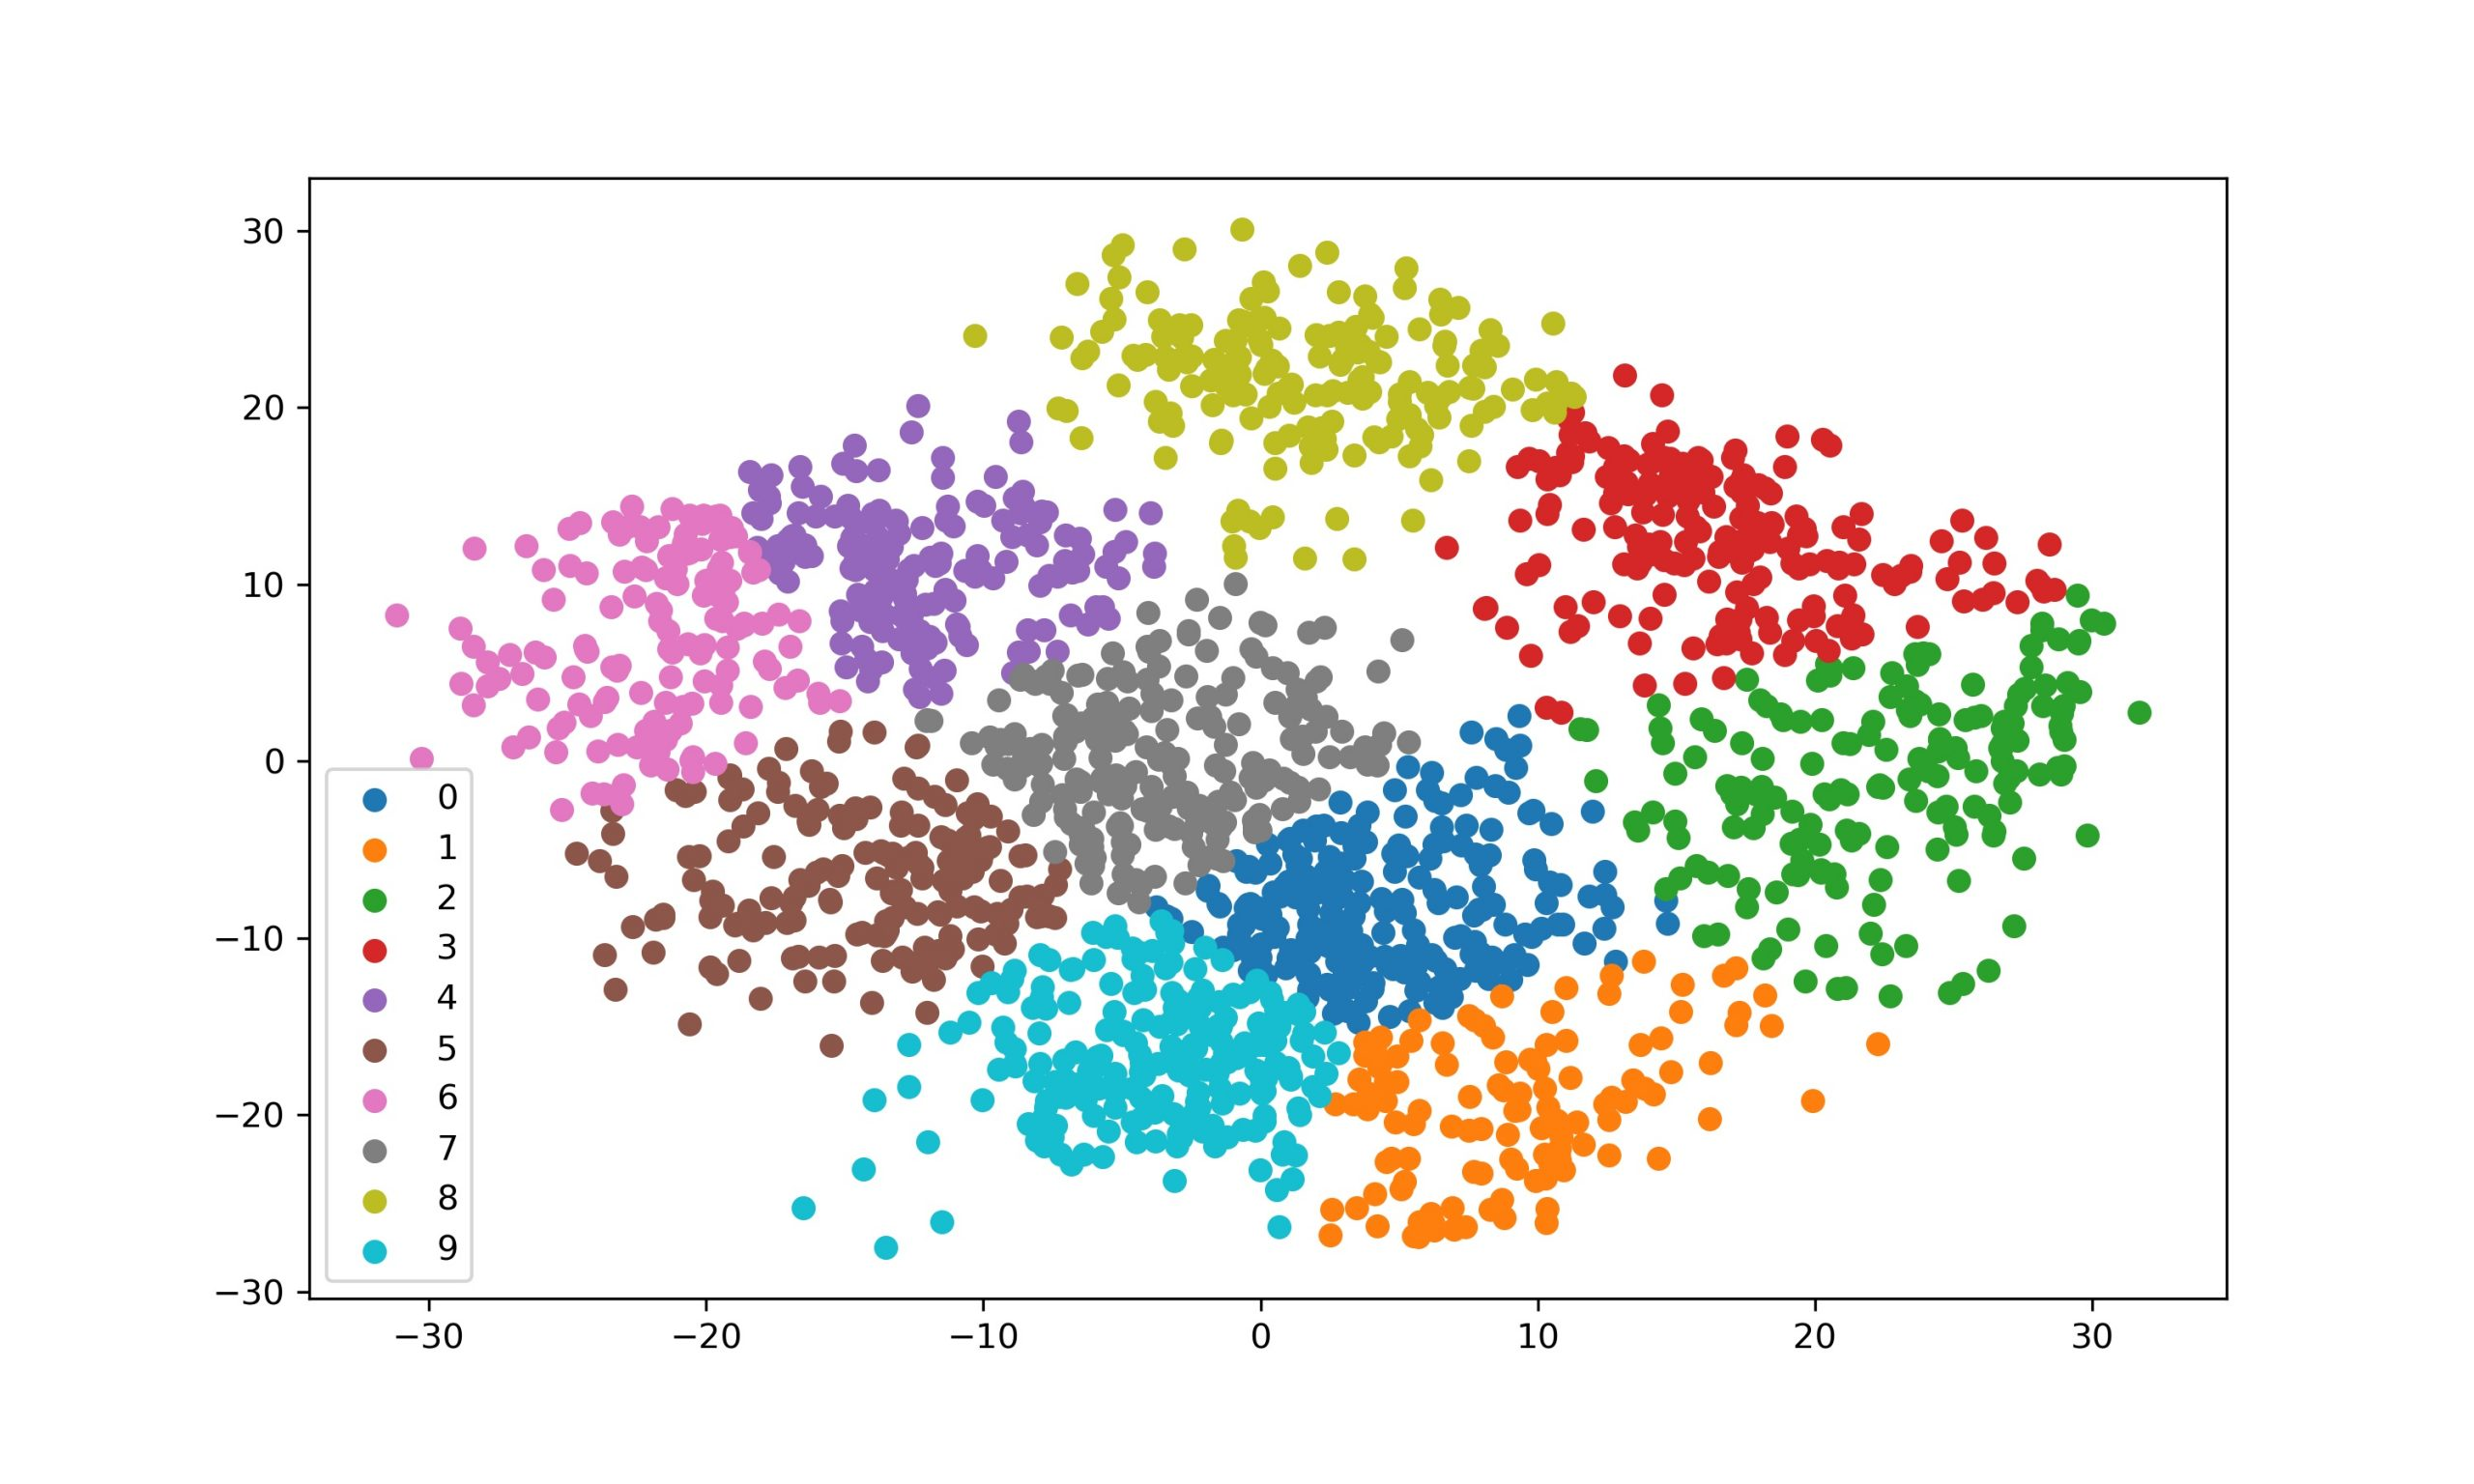

In [60]:
#import libraries

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [15]:
#read data

from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_excel('/content/gdrive/My Drive/DataSet/Escaperoom.xlsx')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


**Sample 1**

In [5]:
def CreateDataset(Cs, nD, S):
    nC = len(Cs)
    N = nD * nC
    X = np.zeros((N, 2))
    for i in range(0, nD):
        for j in range(0, nC):
            X[nC*i + j, 0] = Cs[j, 0] + np.random.randn() / S
            X[nC*i + j, 1] = Cs[j, 1] + np.random.randn() / S
    return X

In [6]:
# Centers of Synthetic Data
Cs = np.array([[5, 2], [5, -2],
                [0, 5], [0, -5]])
nD = 2500 # Count of Data in Each Cluster
S = 2.5

X = CreateDataset(Cs, nD, S)

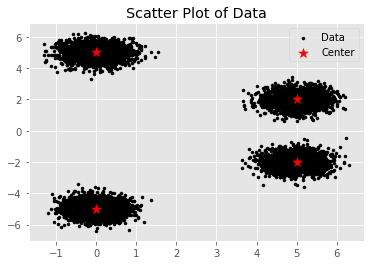

In [7]:
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], c = 'k', s = 9, label = 'Data')
plt.scatter(Cs[:, 0], Cs[:, 1], c = 'r', s = 100, label = 'Center', marker = '*')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, init='random', random_state = 1).fit(X)

In [9]:
centers = kmeans.cluster_centers_

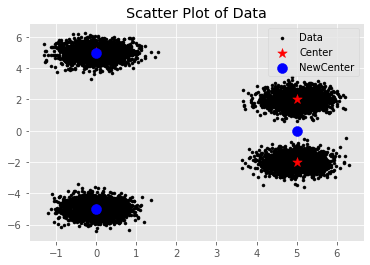

In [10]:
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], c = 'k', s = 9, label = 'Data')
plt.scatter(Cs[:, 0], Cs[:, 1], c = 'r', s = 100, label = 'Center', marker = '*')
plt.scatter(centers[:, 0], centers[:, 1], c = 'b', s = 100, label = 'NewCenter', marker = 'o')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

In [11]:
kmeans_plusplus = KMeans(n_clusters=3, init='k-means++').fit(X)

In [12]:
centers_plusplus = kmeans_plusplus.cluster_centers_

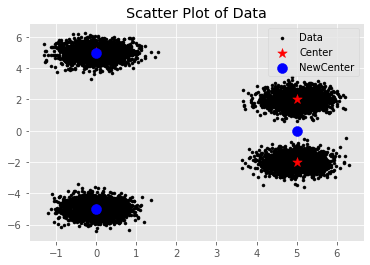

In [13]:
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], c = 'k', s = 9, label = 'Data')
plt.scatter(Cs[:, 0], Cs[:, 1], c = 'r', s = 100, label = 'Center', marker = '*')
plt.scatter(centers_plusplus[:, 0], centers_plusplus[:, 1], c = 'b', s = 100, label = 'NewCenter', marker = 'o')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

**EscapeRoom**

In [16]:
df.head()

,Number,M-F,Ave_Age,Prev_Ed,Ave_Exp,Ave_Fear,Hint,Ans,Plague,Progress,Victory
0,4,0.00,26.75,16,0.50,62.50,6,2,0,87,0
1,5,0.20,31.20,16,1.40,77.00,7,4,0,82,0
2,7,1.00,18.71,12,2.57,80.71,10,3,0,81,0
3,7,0.14,21.86,16,2.14,45.00,6,2,0,102,1
4,5,0.20,26.80,21,3.60,66.00,3,0,0,111,1


In [21]:
X = df.values[:,:9]
Y = df.values[:,10:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [22]:
X_numerical = df[["Number", "M-F", "Ave_Age", "Prev_Ed", "Ave_Fear", "Hint", "Ans"]]

In [55]:
accuracy = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_numerical)
  y_pred = kmeans.predict(X_numerical)
  acc = accuracy_score(Y, y_pred)
  accuracy.append(acc)


Text(0, 0.5, 'Inertia')

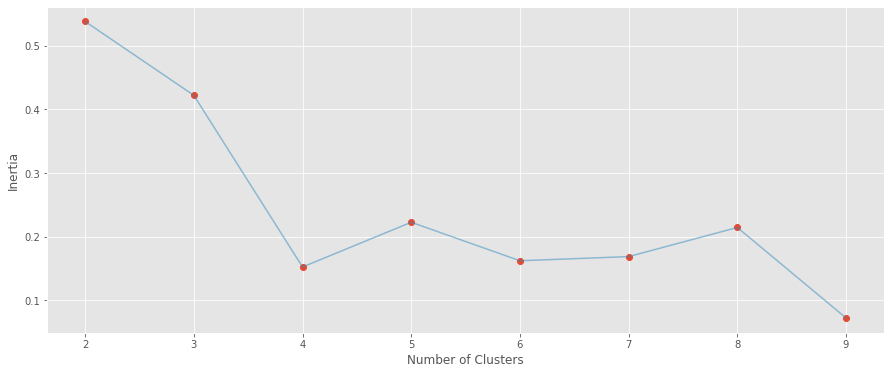

In [56]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 10) , accuracy , 'o')
plt.plot(np.arange(2 , 10) , accuracy , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') 
plt.ylabel('Inertia')

without clustering

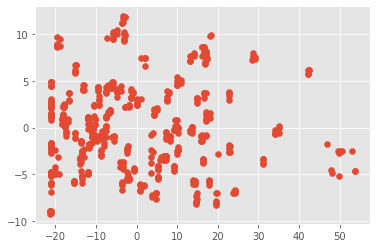

In [61]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.style.use('ggplot')
plt.scatter(X_pca[:,0],X_pca[:,1])

with clustering

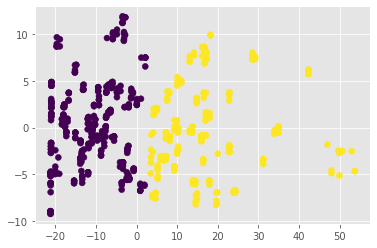

In [62]:
kmeans = KMeans(n_clusters = 2 ,init='k-means++',random_state= 111  )
kmeans.fit(X_numerical)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
plt.style.use('ggplot')
plt.scatter(X_pca[:,0], X_pca[:,1] , c=labels1)